In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# configure pd to view all columns and rows in df.head()
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
SAVE_FIG = False

In [6]:
data = pd.read_csv("../clean_data.csv")

data.shape

(51598, 12)

In [7]:
data["tier"] = np.round(data["targetRank"]/20).astype(np.int8)
data["admit"] = data["admit"].astype(np.int8)
data["year"] = data["year"].astype(np.int16) 
data = data[data["year"]>2000]
data['workExp']= data['industryExp']+data['internExp']
admit = data['admit']
data.drop(columns =["admit",'industryExp','internExp'], inplace = True)
data['admit']=admit
data.shape

(51596, 12)

In [8]:
 data.head(10)

,cgpaRatio,greV,greQ,researchExp,journalPubs,confPubs,univName,year,targetRank,tier,workExp,admit
0,0.955056,160.0,167.0,0,0,0,Worcester Polytechnic Institute,2015,91,5,23.0,1
1,0.966420,146.0,157.0,0,0,0,Worcester Polytechnic Institute,2015,91,5,66.0,1
2,0.814286,148.0,161.0,0,0,0,Worcester Polytechnic Institute,2011,91,5,0.0,1
3,0.799383,150.0,161.0,0,0,0,Worcester Polytechnic Institute,2015,91,5,0.0,1
4,0.684211,147.0,156.0,0,0,0,Worcester Polytechnic Institute,2012,91,5,0.0,1
5,0.864865,152.0,158.0,0,0,0,Worcester Polytechnic Institute,2011,91,5,0.0,1
6,0.882946,156.0,163.0,0,0,0,Worcester Polytechnic Institute,2011,91,5,0.0,1
7,0.882946,148.0,153.0,0,0,0,Worcester Polytechnic Institute,2012,91,5,0.0,1
8,0.844156,152.0,163.0,0,0,0,Worcester Polytechnic Institute,2011,91,5,0.0,1
9,0.866667,152.0,163.0,0,0,0,Worcester Polytechnic Institute,2011,91,5,0.0,1


### School

In [9]:
uni = ["Stanford University", # 2
       "University of California San Diego", # 9
       "SUNY Stony Brook", #65
      ]
# change this to see  different univer      
i=1

In [10]:
ucsd_data=data[data["univName"]==uni[i]]
print(uni[i],ucsd_data.shape)
ucsd_data=ucsd_data.drop(columns="univName",axis=1)

University of California San Diego (642, 12)


In [11]:
ucsd_num_apply = ucsd_data.shape[0]
ucsd_num_admit = ucsd_data["admit"].sum()
ucsd_num_reject = ucsd_num_apply-ucsd_num_admit
print("Num_admit",ucsd_num_admit)
print("Num_reject", ucsd_num_reject)
print(ucsd_num_admit/ucsd_num_apply*100,"%")

Num_admit 143
Num_reject 499
22.274143302180686 %


<Figure size 1440x576 with 0 Axes>

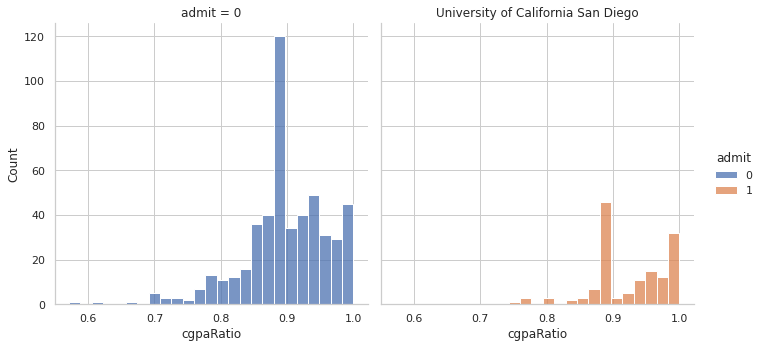

In [12]:
plt.figure(figsize=(20,8))
sns.displot(data=ucsd_data, x="cgpaRatio", hue="admit",col="admit",multiple="stack")
plt.title(uni[i])
plt.show()

<Figure size 1440x576 with 0 Axes>

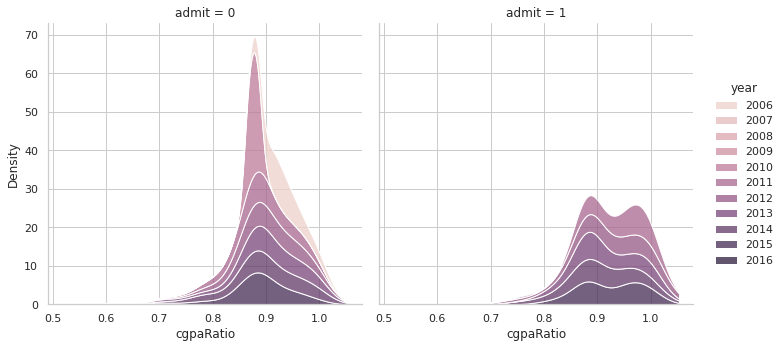

In [13]:
plt.figure(figsize=(20,8))
sns.displot(data=ucsd_data, x="cgpaRatio",hue="year",col="admit",kind="kde",multiple="stack",common_norm=False)

fname = "UCSD_cgpa"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

### GREV

<Figure size 1008x432 with 0 Axes>

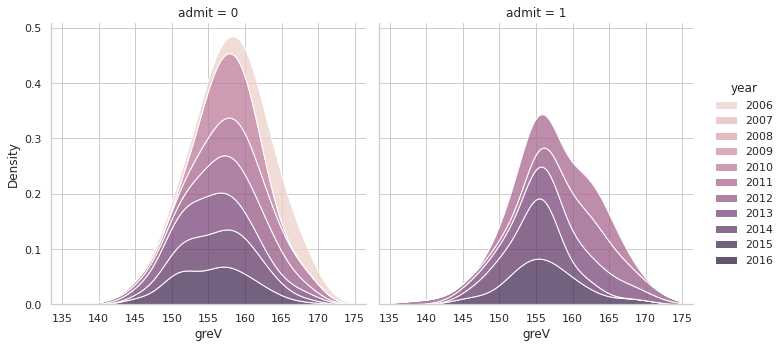

In [14]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="greV", hue="year",col="admit",kind="kde",multiple="stack", common_norm=False )

fname = "UCSD_GREV"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

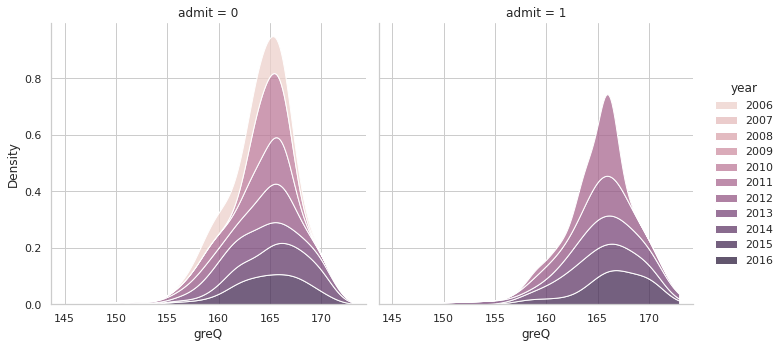

In [15]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="greQ", hue="year",col="admit",kind="kde",multiple='stack', common_norm=False)

fname = "UCSD_GREQ"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

### researchExp industryExp internExp journalPubs confPubs

<Figure size 1008x432 with 0 Axes>

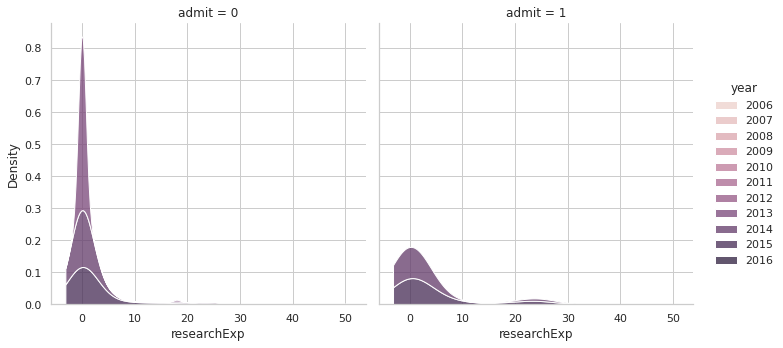

In [16]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="researchExp", hue="year",col="admit",kind="kde",multiple="stack",common_norm=False)

plt.show()

<Figure size 1008x432 with 0 Axes>

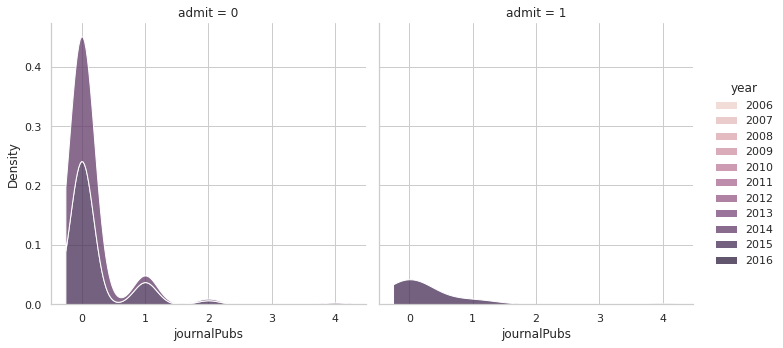

In [17]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="journalPubs", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

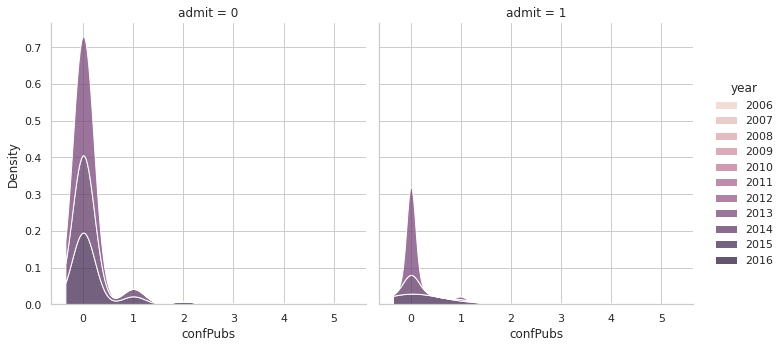

In [18]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="confPubs", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

### UCSD Heatmap
0.00-.19 "very weak"

0.20-0.39 “weak”

0.40-0.59 “moderate”

0.60-0.79 “strong”

0.80-1.0 “very strong

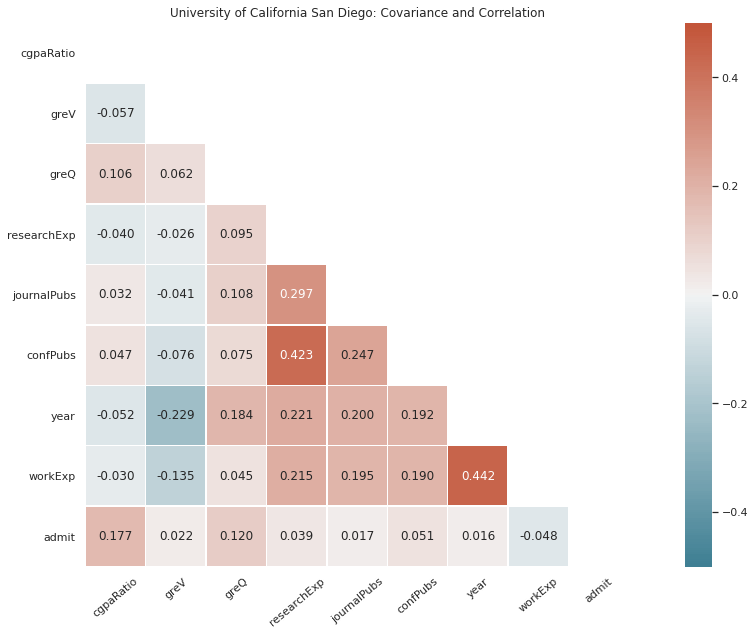

In [19]:
plt.figure(figsize=(20,10))
corr_ucsd = ucsd_data.drop(columns=["targetRank","tier"],axis=1).corr()
mask = np.triu(np.ones_like(corr_ucsd, dtype=np.bool))
sns.heatmap(corr_ucsd, vmin= -0.5, vmax= 0.5, center=0,
            mask=mask,
            cmap=sns.diverging_palette(220, 20, n=200),
            square=True,fmt='.3f', linewidths=.5, annot=True,)
plt.title(uni[i]+': '+'Covariance and Correlation')
plt.xticks(rotation=40, fontsize= 11)
plt.yticks(rotation=0, )
fname = "UCSD_Corr"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

In [20]:
# 0: greV
# 1 cgpa,greQ
# 2 cgpa,greQ

## Overall Data

<Figure size 1008x432 with 0 Axes>

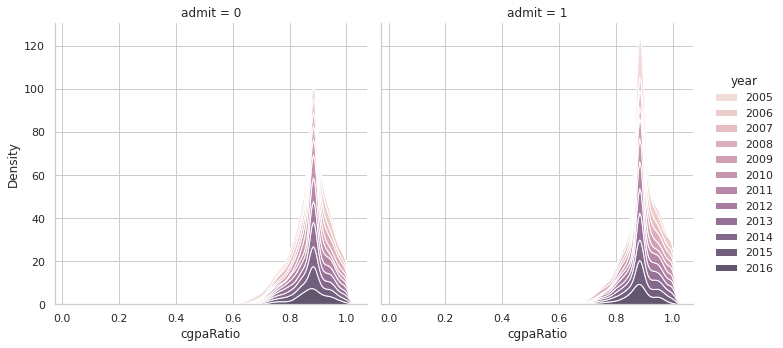

In [21]:
# overall cpgaRatio
plt.figure(figsize=(14,6))
sns.displot(data=data, x="cgpaRatio", hue="year",col="admit",kind="kde",multiple="stack",common_norm=False)
fname = "overall_cgpa"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

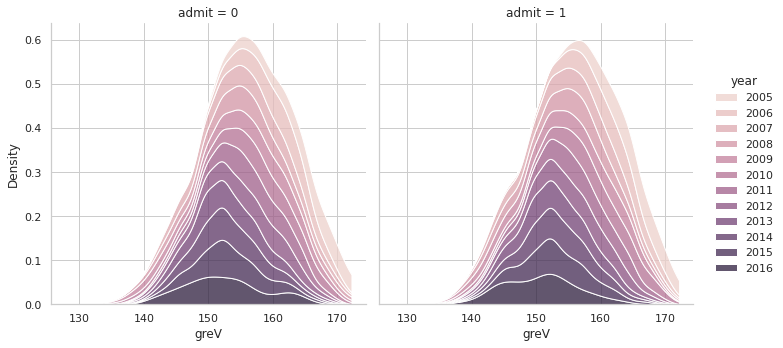

In [22]:
# overall greV
plt.figure(figsize=(14,6))
sns.displot(data=data, x="greV", hue="year",col="admit",kind="kde",multiple="stack",common_norm=False)
fname = "overall_greV"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

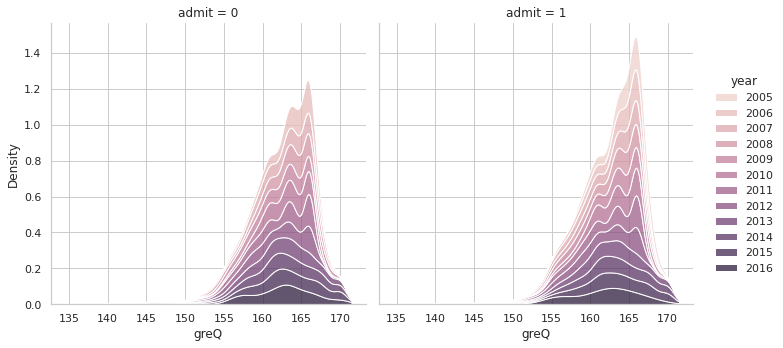

In [23]:
# greQ
plt.figure(figsize=(14,6))
sns.displot(data=data, x="greQ", hue="year",col="admit",kind="kde",multiple="stack",common_norm=False)
fname = "overall_greQ"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

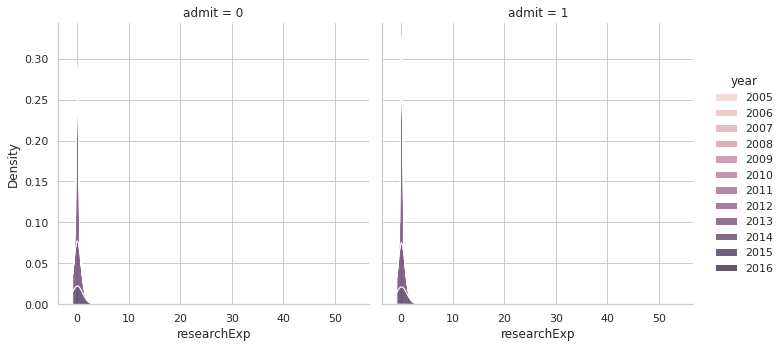

In [24]:
# researchExp 
plt.figure(figsize=(14,6))
sns.displot(data=data, x="researchExp", hue="year",col="admit",kind="kde",multiple="stack")
fname = "researchExp"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

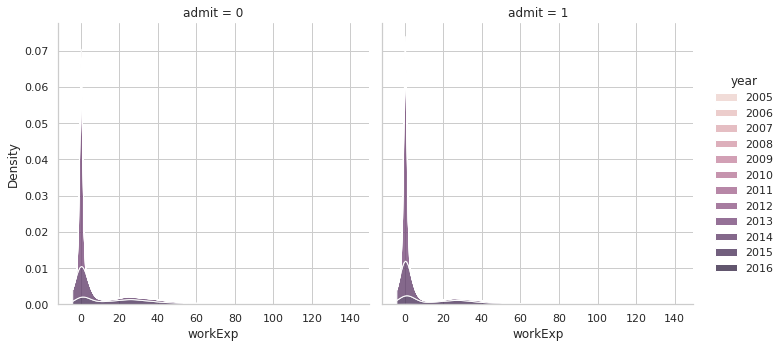

In [25]:
# workExp
plt.figure(figsize=(14,6))
sns.displot(data=data, x="workExp", hue="year",col="admit",kind="kde",multiple="stack")
fname = "workExp"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

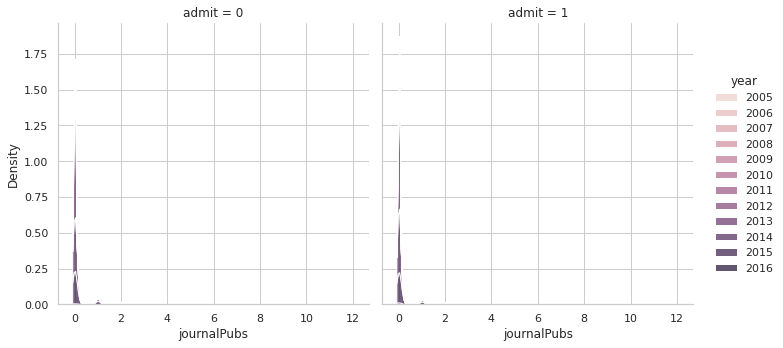

In [26]:
# journalPubs
plt.figure(figsize=(14,6))
sns.displot(data=data, x="journalPubs", hue="year",col="admit",kind="kde",multiple="stack")
fname = "journalPubs"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

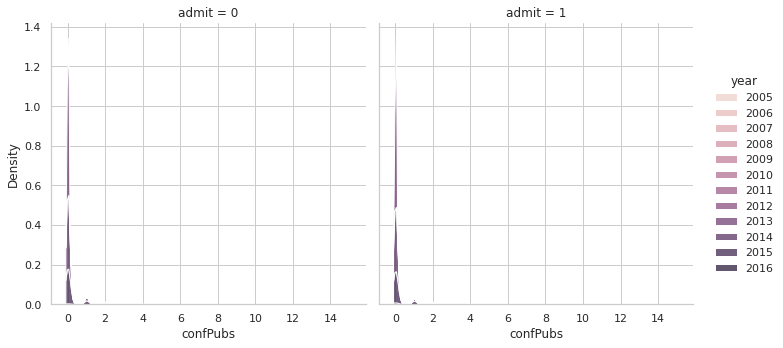

In [27]:
# confPubs
plt.figure(figsize=(14,6))
sns.displot(data=data, x="confPubs", hue="year",col="admit",kind="kde",multiple="stack")
fname = "confPubs"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

<Figure size 1008x432 with 0 Axes>

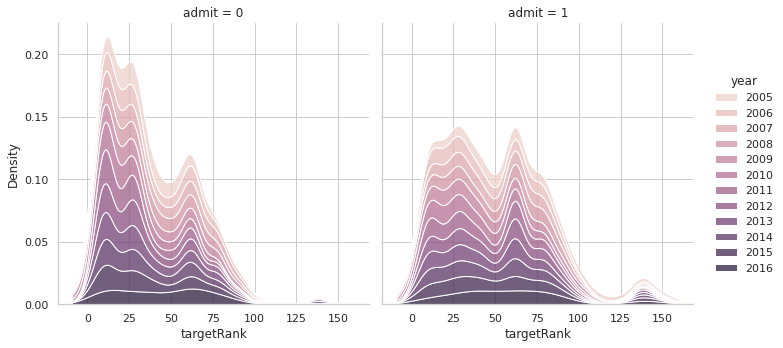

In [28]:
# target rank
plt.figure(figsize=(14,6))
sns.displot(data=data, x="targetRank", hue="year",col="admit",kind="kde",multiple="stack",common_norm=False)
fname = "overall_targetRank"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()

### Heatmap
0.00-.19 "very weak"

0.20-0.39 “weak”

0.40-0.59 “moderate”

0.60-0.79 “strong”

0.80-1.0 “very strong

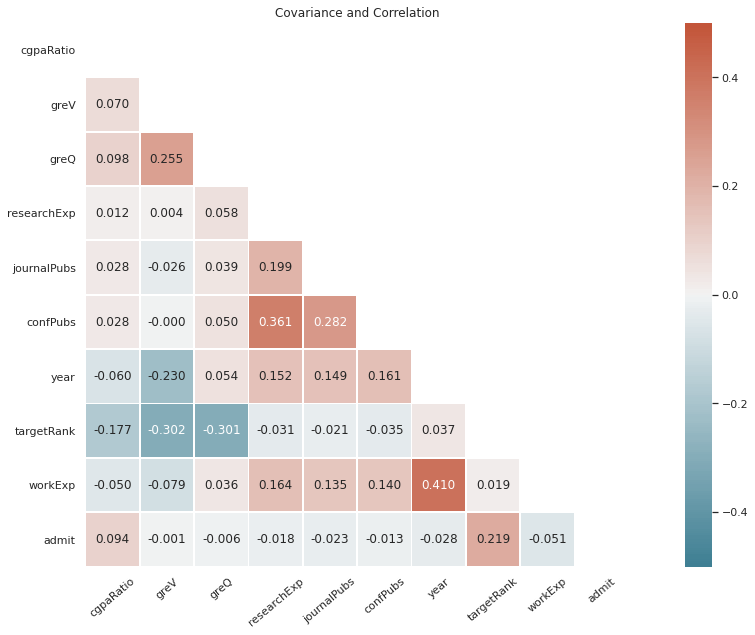

In [29]:
plt.figure(figsize=(20,10))
corr_data = data.copy()
corr_data.drop(columns=["tier"],inplace=True)

data_corr = corr_data.corr()
#
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))
sns.heatmap(data_corr, vmin= -0.5, vmax= 0.5, center=0,
            mask=mask,
            cmap=sns.diverging_palette(220, 20, n=200),
            square=True,fmt='.3f', linewidths=.8, annot=True,)
plt.title('Covariance and Correlation')
plt.xticks(rotation=40, fontsize= 11)
plt.yticks(rotation=0, )
fname = "overall_corr"
if SAVE_FIG:
    plt.savefig(fname)
plt.show()